# Permanent magnet assembly B-field simulation

## Maxwell Coil
Maxwell 3 coil setup

Maximum B-field along +z direction: 5.263 G
Central B-field along +z axis: 5.263 G
Maximum B-field along +x direction: 5.263 G
Central B-field along +x axis: 5.263 G
Min transverse nonuniformity: 0.0
Max transverse nonuniformity:2.1825743538652472e-06
Min axial nonuniformity: 0.0
Max axial nonuniformity:0.0185565100848798


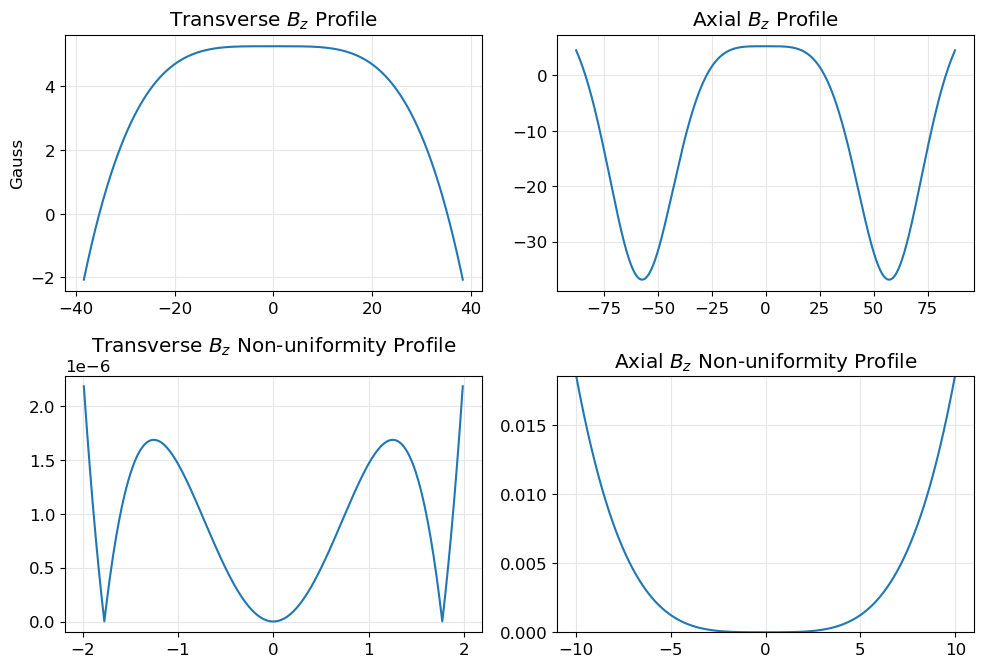

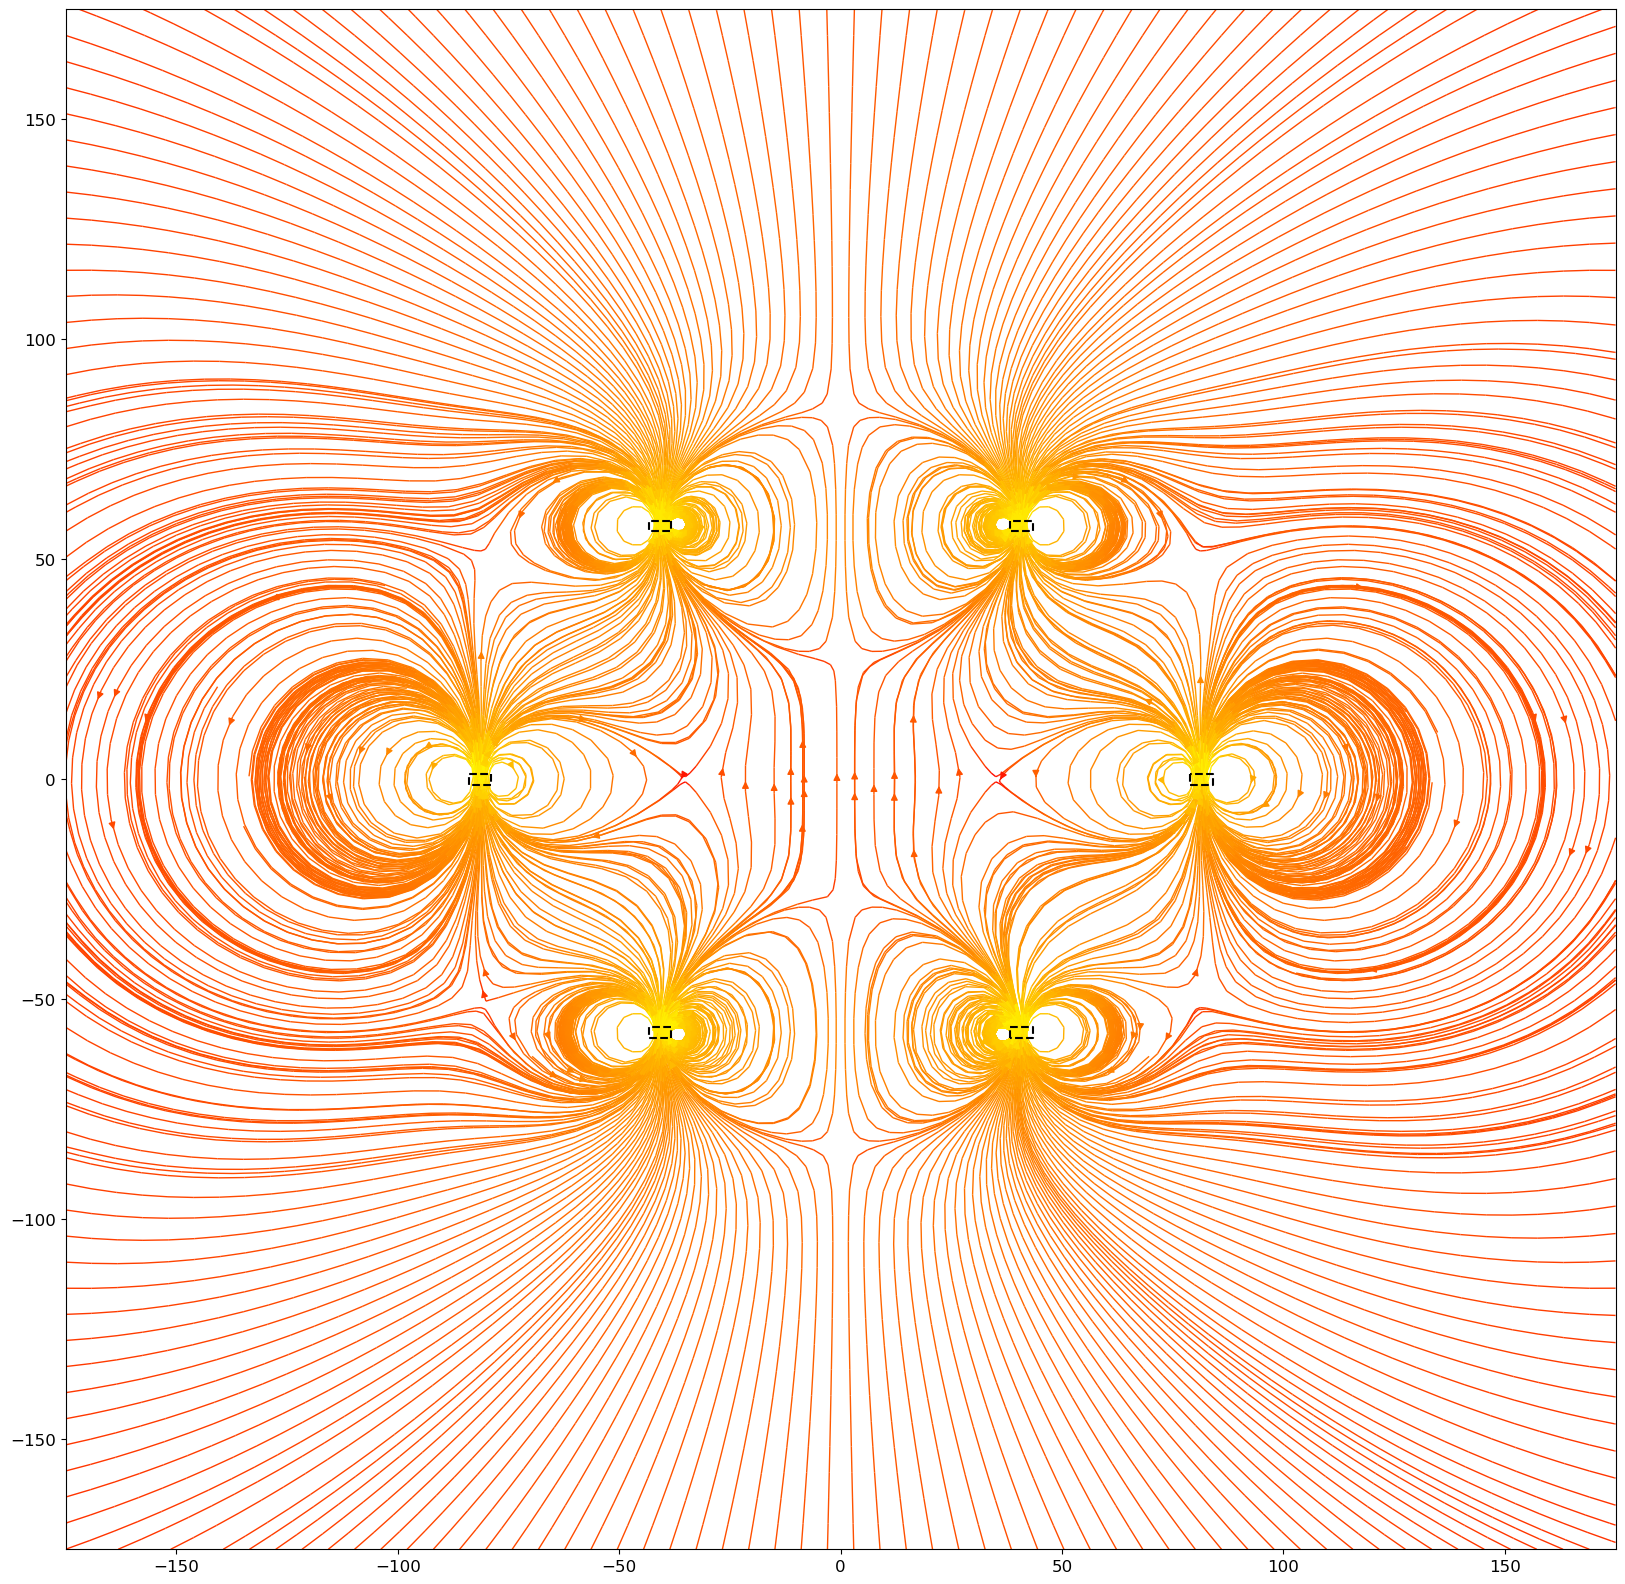

In [5]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream
import magpylib as magpy
from magpylib.magnet import CylinderSegment


thickness = 2.4
width = 5
innerrad = 33.354

""" following definition of maxwell coil"""
#inner radius of middle coil
# innerrad_mid = np.sqrt(7/4) * (innerrad + width/2) - width/2
# coil separation
# maxwell_dist = np.sqrt(3/7) * innerrad_mid

"""custom definition"""
innerrad_mid = 3 * (innerrad + width/2)
maxwell_dist = 0.5 * innerrad_mid

"""custom definition"""
"""
achieves 3.5e-5 maximum nonuniformity over 8mm
"""
innerrad = 38.354
width = 5
innerrad_mid = 1.94 * (innerrad + width/2)
maxwell_dist = 1.5 * innerrad

"""custom definition"""
"""
achieves 2e-5 maximum nonuniformity over 7mm
"""
innerrad = 38.354
width = 5
innerrad_mid = 1.938 * (innerrad + width/2)
maxwell_dist = 1.5 * innerrad

"""custom definition"""
"""
achieves 2e-6 maximum nonuniformity over 4mm
"""
innerrad = 38.354
innerrad_mid = 2.06 * (innerrad)
maxwell_dist = 1.5 * innerrad

Br = 1.09e3 # in mT
mT_to_T = 1e3
mT_to_G = 10

# define rings in maxwell coil
maxwell3 = magpy.Collection()
ring_top = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad, innerrad + width, thickness, 0, 360),
                           position = (0, 0, +maxwell_dist))
ring_mid = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad_mid, innerrad_mid + width, thickness, 0, 360),
                           position = (0, 0, 0))
ring_bot = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad, innerrad + width, thickness, 0, 360),
                           position = (0, 0, -maxwell_dist))
maxwell3.add(ring_top).add(ring_bot).add(ring_mid)
# maxwell3.add(ring_mid)

get_field_on_axes(maxwell3, dist*2, innerrad*2, [-2,2], [-10,10])

x_bounds = [-175, 175]
z_bounds = [-175, 175]
outerrad = innerrad + width
nearsurface_z = maxwell_dist - thickness/2
farsurface_z = maxwell_dist + thickness/2

outerrad_mid = innerrad_mid + width

cross_section_3_coils = np.array([
    [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
    [[innerrad,innerrad,outerrad,outerrad,innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
    [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]],
    [[innerrad,innerrad,outerrad,outerrad,innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]],
    [[-innerrad_mid,-innerrad_mid,-outerrad_mid,-outerrad_mid,-innerrad_mid], [thickness/2,-thickness/2,-thickness/2,thickness/2,thickness/2]],
    [[innerrad_mid,innerrad_mid,outerrad_mid,outerrad_mid,innerrad_mid], [thickness/2,-thickness/2,-thickness/2,thickness/2,thickness/2]],
])
make_flux_stream(maxwell3, x_bounds, z_bounds, cross_section_3_coils)